# Stock Forecasting using ARCH

### Volatility Forecasting

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.rc("figure", figsize=(18, 8))
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

from arch import arch_model
from arch.univariate import ConstantMean, GARCH, Normal

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
symbol = '^GSPC' # input
start = '2008-01-01' # input 
end = '2022-07-22'  # input
df = yf.download(symbol, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,1467.969971,1471.770020,1442.069946,1447.160034,1447.160034,3452650000
2008-01-03,1447.550049,1456.800049,1443.729980,1447.160034,1447.160034,3429500000
2008-01-04,1444.010010,1444.010010,1411.189941,1411.630005,1411.630005,4166000000
2008-01-07,1414.069946,1423.869995,1403.449951,1416.180054,1416.180054,4221260000
2008-01-08,1415.709961,1430.280029,1388.300049,1390.189941,1390.189941,4705390000


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-15,3818.000000,3863.620117,3817.179932,3863.159912,3863.159912,3537130000
2022-07-18,3883.790039,3902.439941,3818.629883,3830.850098,3830.850098,3414470000
2022-07-19,3860.729980,3939.810059,3860.729980,3936.689941,3936.689941,3160350000
2022-07-20,3935.320068,3974.129883,3922.030029,3959.899902,3959.899902,3452150000
2022-07-21,3955.469971,3999.290039,3927.639893,3998.949951,3998.949951,3586030000


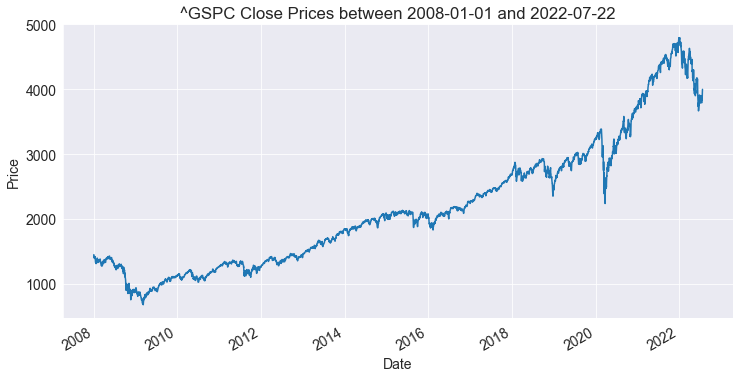

In [5]:
plt.figure(figsize = (12, 6))
plt.title(symbol + ' Close Prices between {} and {}'.format(
    start,
    end
))
df['Adj Close'].plot()
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

In [6]:
returns = 100 * df['Adj Close'].pct_change().dropna()

In [7]:
am = arch_model(returns, vol="Garch", p=1, o=0, q=1, dist="Normal")
res = am.fit(update_freq=5)

Iteration:      5,   Func. Count:     38,   Neg. LLF: 5030.09433412842
Iteration:     10,   Func. Count:     66,   Neg. LLF: 5025.148069590621
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5025.148069590621
            Iterations: 11
            Function evaluations: 70
            Gradient evaluations: 11


In [8]:
forecasts = res.forecast()


In [9]:
print(forecasts.mean.iloc[-3:])
print(forecasts.residual_variance.iloc[-3:])
print(forecasts.variance.iloc[-3:])


                 h.1
Date                
2022-07-19       NaN
2022-07-20       NaN
2022-07-21  0.077841
                 h.1
Date                
2022-07-19       NaN
2022-07-20       NaN
2022-07-21  1.772736
                 h.1
Date                
2022-07-19       NaN
2022-07-20       NaN
2022-07-21  1.772736


In [10]:
forecasts = res.forecast(horizon=5)
print(forecasts.residual_variance.iloc[-3:])

                 h.1       h.2       h.3       h.4       h.5
Date                                                        
2022-07-19       NaN       NaN       NaN       NaN       NaN
2022-07-20       NaN       NaN       NaN       NaN       NaN
2022-07-21  1.772736  1.772316  1.771904  1.771498  1.771099


In [11]:
print(forecasts.residual_variance.iloc[-3:])

                 h.1       h.2       h.3       h.4       h.5
Date                                                        
2022-07-19       NaN       NaN       NaN       NaN       NaN
2022-07-20       NaN       NaN       NaN       NaN       NaN
2022-07-21  1.772736  1.772316  1.771904  1.771498  1.771099


In [12]:
res = am.fit(last_obs="2021-01-01", update_freq=5)
forecasts = res.forecast(horizon=5)
print(forecasts.variance.dropna().head())

Iteration:      5,   Func. Count:     36,   Neg. LLF: 4468.937834715194
Iteration:     10,   Func. Count:     65,   Neg. LLF: 4461.199728629211
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4461.199728630086
            Iterations: 10
            Function evaluations: 65
            Gradient evaluations: 10
                 h.1       h.2       h.3       h.4       h.5
Date                                                        
2020-12-31  0.359638  0.381959  0.403948  0.425609  0.446948
2021-01-04  0.721860  0.738787  0.755461  0.771887  0.788068
2021-01-05  0.684739  0.702218  0.719437  0.736400  0.753109
2021-01-06  0.628981  0.647291  0.665328  0.683096  0.700600
2021-01-07  0.868704  0.883443  0.897963  0.912267  0.926357


In [13]:
import sys

index = returns.index
start_loc = 0
end_loc = np.where(index >= "2020-01-01")[0].min()
forecasts = {}
for i in range(20):
    sys.stdout.write(".")
    sys.stdout.flush()
    res = am.fit(first_obs=i, last_obs=i + end_loc, disp="off")
    temp = res.forecast(horizon=3).variance
    fcast = temp.iloc[0]
    forecasts[fcast.name] = fcast
print()
print(pd.DataFrame(forecasts).T)

....................
            h.1  h.2  h.3
2008-01-03  NaN  NaN  NaN


In [14]:
index = returns.index
start_loc = 0
end_loc = np.where(index >= "2020-01-01")[0].min()
forecasts = {}
for i in range(20):
    sys.stdout.write(".")
    sys.stdout.flush()
    res = am.fit(last_obs=i + end_loc, disp="off")
    temp = res.forecast(horizon=3).variance
    fcast = temp.iloc[0]
    forecasts[fcast.name] = fcast
print()
print(pd.DataFrame(forecasts).T)

....................
            h.1  h.2  h.3
2008-01-03  NaN  NaN  NaN


In [15]:
# TARCH specification
am = arch_model(returns, vol="GARCH", power=2.0, p=1, o=1, q=1)
res = am.fit(update_freq=5)
forecasts = res.forecast()
print(forecasts.variance.iloc[-1])

Iteration:      5,   Func. Count:     40,   Neg. LLF: 5011.319575557525
Iteration:     10,   Func. Count:     74,   Neg. LLF: 4964.582344509452
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4964.580184389601
            Iterations: 14
            Function evaluations: 98
            Gradient evaluations: 14
h.1    0.970452
Name: 2022-07-21 00:00:00, dtype: float64


### Simulation Forecasts

(18995.0, 19194.0)

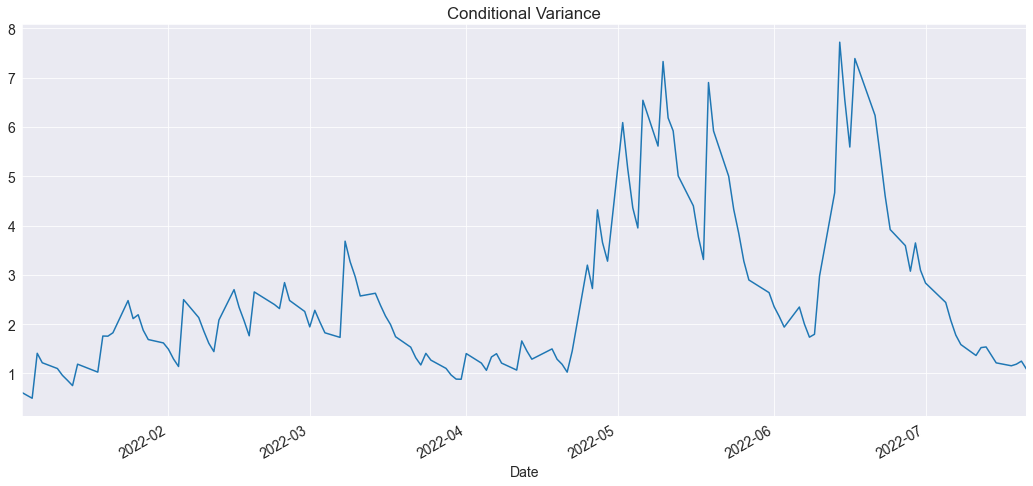

In [16]:
fig, ax = plt.subplots(1, 1)
var_2022 = res.conditional_volatility["2022"] ** 2.0
subplot = var_2022.plot(ax=ax, title="Conditional Variance")
subplot.set_xlim(var_2022.index[0], var_2022.index[-1])

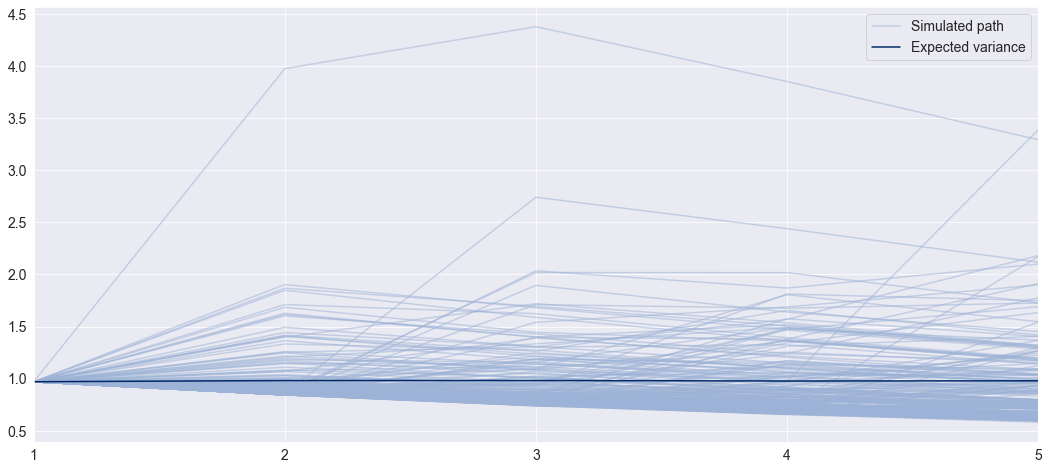

In [17]:
forecasts = res.forecast(horizon=5, method="simulation")
sims = forecasts.simulations

x = np.arange(1, 6)
lines = plt.plot(x, sims.residual_variances[-1, ::5].T, color="#9cb2d6", alpha=0.5)
lines[0].set_label("Simulated path")
line = plt.plot(x, forecasts.variance.iloc[-1].values, color="#002868")
line[0].set_label("Expected variance")
plt.gca().set_xticks(x)
plt.gca().set_xlim(1, 5)
legend = plt.legend()


<AxesSubplot:>

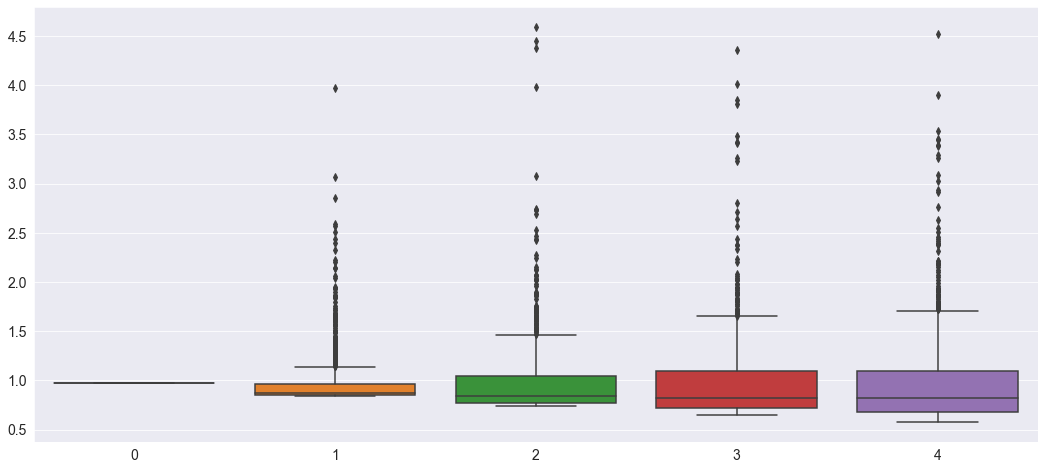

In [18]:
sns.boxplot(data=sims.variances[-1])

### Bootstrap Forecasts

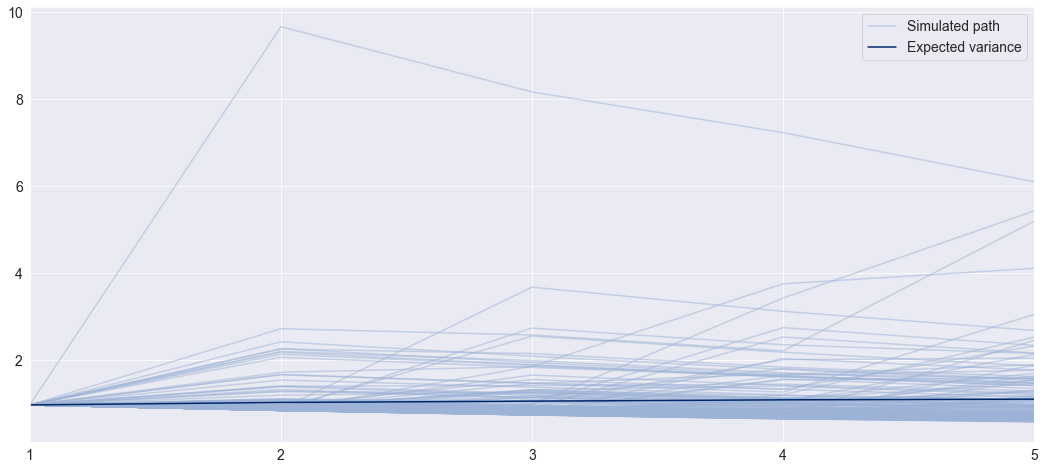

In [19]:
forecasts = res.forecast(horizon=5, method="bootstrap")
sims = forecasts.simulations

lines = plt.plot(x, sims.residual_variances[-1, ::5].T, color="#9cb2d6", alpha=0.5)
lines[0].set_label("Simulated path")
line = plt.plot(x, forecasts.variance.iloc[-1].values, color="#002868")
line[0].set_label("Expected variance")
plt.gca().set_xticks(x)
plt.gca().set_xlim(1, 5)
legend = plt.legend()

### Value-at-Risk Forecasting

In [20]:
am = arch_model(returns, vol="Garch", p=1, o=0, q=1, dist="skewt")
res = am.fit(disp="off", last_obs="2017-12-31")



### Parametric VaR

In [21]:
forecasts = res.forecast(start="2022-01-01")
cond_mean = forecasts.mean["2022":]
cond_var = forecasts.variance["2022":]
q = am.distribution.ppf([0.01, 0.05], res.params[-2:])
print(q)

[-2.71837196 -1.62773201]


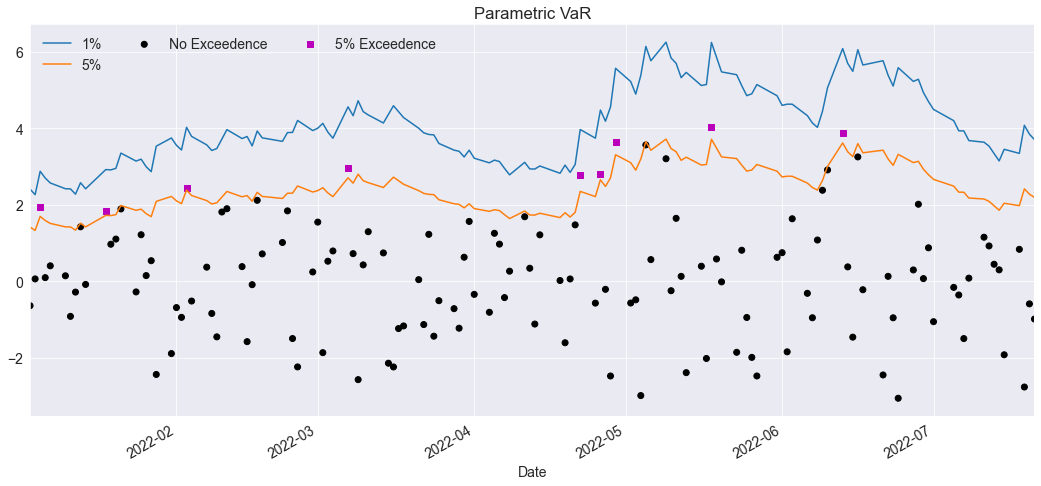

In [22]:
value_at_risk = -cond_mean.values - np.sqrt(cond_var).values * q[None, :]
value_at_risk = pd.DataFrame(value_at_risk, columns=["1%", "5%"], index=cond_var.index)
ax = value_at_risk.plot(legend=False)
xl = ax.set_xlim(value_at_risk.index[0], value_at_risk.index[-1])
rets_2022 = returns["2022":].copy()
rets_2022.name = "S&P 500 Return"
c = []
for idx in value_at_risk.index:
    if rets_2022[idx] > -value_at_risk.loc[idx, "5%"]:
        c.append("#000000")
    elif rets_2022[idx] < -value_at_risk.loc[idx, "1%"]:
        c.append("#BB0000")
    else:
        c.append("#BB00BB")
c = np.array(c, dtype="object")
labels = {
    "#BB0000": "1% Exceedence",
    "#BB00BB": "5% Exceedence",
    "#000000": "No Exceedence",
}
markers = {"#BB0000": "x", "#BB00BB": "s", "#000000": "o"}
for color in np.unique(c):
    sel = c == color
    ax.scatter(
        rets_2022.index[sel],
        -rets_2022.loc[sel],
        marker=markers[color],
        c=c[sel],
        label=labels[color],
    )
ax.set_title("Parametric VaR")
leg = ax.legend(frameon=False, ncol=3)

### Filtered Historical Simulation

In [23]:
std_rets = (returns[:"2022"] - res.params["mu"]) / res.conditional_volatility
std_rets = std_rets.dropna()
q = std_rets.quantile([0.01, 0.05])
print(q)


0.01   -2.810256
0.05   -1.790682
dtype: float64


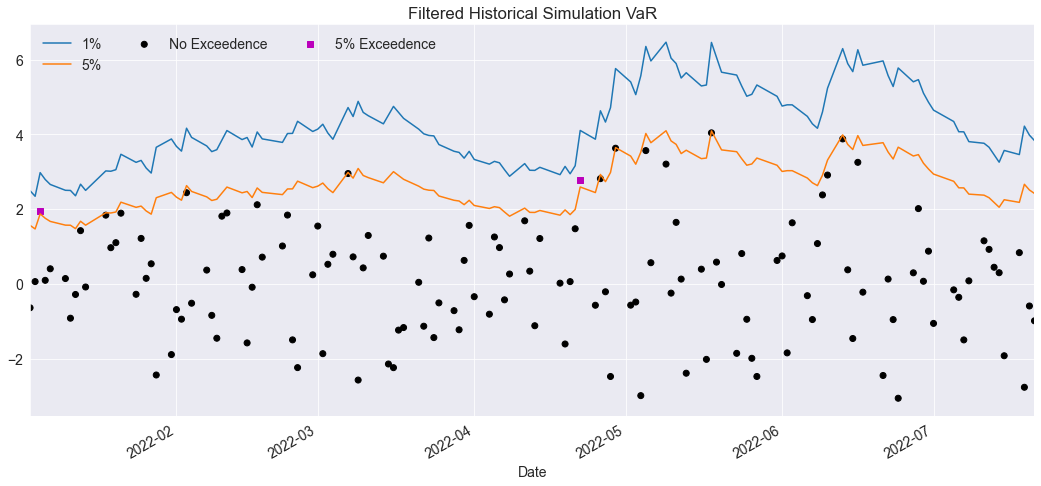

In [24]:
value_at_risk = -cond_mean.values - np.sqrt(cond_var).values * q.values[None, :]
value_at_risk = pd.DataFrame(value_at_risk, columns=["1%", "5%"], index=cond_var.index)
ax = value_at_risk.plot(legend=False)
xl = ax.set_xlim(value_at_risk.index[0], value_at_risk.index[-1])
rets_2022 = returns["2022":].copy()
rets_2022.name = "S&P 500 Return"
c = []
for idx in value_at_risk.index:
    if rets_2022[idx] > -value_at_risk.loc[idx, "5%"]:
        c.append("#000000")
    elif rets_2022[idx] < -value_at_risk.loc[idx, "1%"]:
        c.append("#BB0000")
    else:
        c.append("#BB00BB")
c = np.array(c, dtype="object")
for color in np.unique(c):
    sel = c == color
    ax.scatter(
        rets_2022.index[sel],
        -rets_2022.loc[sel],
        marker=markers[color],
        c=c[sel],
        label=labels[color],
    )
ax.set_title("Filtered Historical Simulation VaR")
leg = ax.legend(frameon=False, ncol=3)